In [1]:
import xlrd
import pylab as pylab
import numpy as np
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.interpolate
%matplotlib inline 

In [2]:
workbook= xlrd.open_workbook('Toma4_reducido.xlsx')
sheet_names=workbook.sheet_names()
print sheet_names

[u'Toma4_reducido (root)', u'promedio', u'suma']


In [3]:
toma_sheet=workbook.sheet_by_name(sheet_names[0])
promedio_sheet=workbook.sheet_by_name(sheet_names[1])
suma_sheet=workbook.sheet_by_name(sheet_names[2])

In [4]:
x_promedio=promedio_sheet.col_values(0)
y_promedio=promedio_sheet.col_values(1)
canalB_promedio=promedio_sheet.col_values(7)
print x_promedio[0]
print y_promedio[0]
print canalB_promedio[0]
#CLeaning list
del x_promedio[0]
del y_promedio[0]
del canalB_promedio[0]
#arrays
x=np.asarray(x_promedio)
y=np.asarray(y_promedio)
z=np.asarray(canalB_promedio)

Eje x
Eje y
Canal B


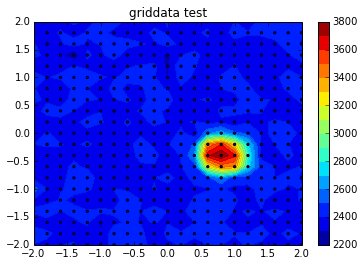

In [5]:
xi = np.linspace(-2,2,21)
yi = np.linspace(-2,2,21)
# grid the data.
zi = griddata(x,y,z,xi,yi)
# contour the gridded data, plotting dots at the randomly spaced data points.

 # draw colorbar
# plot data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.1,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(x,y,marker='o',c='b',s=5)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test')

plt.show()

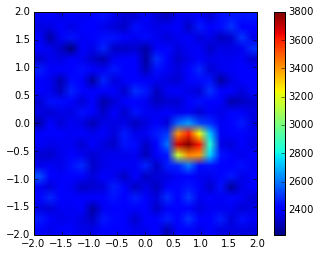

In [6]:
xi,yi=np.meshgrid(xi,yi)
zi=griddata(x,y,z,xi,yi)
#zi = scipy.interpolate.griddata((x, y), z, (xi, yi), method='linear')
plt.imshow(zi,vmin=z.min(),vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.show()